# identity the problem.  发现是要EDA，无需test set.

# 1.EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path='/Users/Elaine/Desktop/Kaggle  dataset/Automobile_data.csv'
df=pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


####  deal with different data type values-float64(5), int64(5), object(16)

# 2.Data Cleaning

# 没有缺失值，开始deal with non-meanful values 

In [5]:
count=df.isnull().sum().sort_values(ascending=False)
ratio=count/len(df)
nulldata=pd.concat([count,ratio],axis=1,keys=['count','ratio'])
nulldata[nulldata.ratio>0]

,count,ratio


# 有啥快的方法看是否有缺失值么？？

# deal with non-meanful values

## object

In [6]:
df.select_dtypes(include=['object']).head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
0,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,13495
1,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,16500
2,?,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000,16500
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.4,102,5500,13950
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.4,115,5500,17450


In [7]:
df['normalized-losses'].unique()
df['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
104     6
134     6
128     6
94      5
74      5
95      5
65      5
103     5
168     5
85      5
102     5
122     4
106     4
118     4
148     4
93      4
154     3
125     3
83      3
101     3
137     3
115     3
164     2
192     2
110     2
89      2
108     2
129     2
188     2
87      2
194     2
119     2
153     2
197     2
113     2
145     2
81      2
158     2
107     1
78      1
256     1
98      1
121     1
77      1
186     1
90      1
231     1
142     1
Name: normalized-losses, dtype: int64

# 都差不多，我选择用mean（）来填充  ？？？ 这个时候我用mean（）来填充对么，应该考虑其他什么？？

In [8]:
df['normalized-losses']=df['normalized-losses'].str.replace('?','1')

In [9]:
df['normalized-losses']=df['normalized-losses'].astype('int64')

In [10]:
#  calculate  mean values
(df['normalized-losses'].sum()-41)/(len(df['normalized-losses'])-41)

122.0

In [11]:
df['normalized-losses']=df['normalized-losses'].replace(1,122)

In [12]:
df['normalized-losses'].unique()
df['normalized-losses'].value_counts()

122    45
161    11
91      8
150     7
104     6
128     6
134     6
65      5
168     5
94      5
95      5
85      5
102     5
103     5
74      5
106     4
118     4
148     4
93      4
83      3
101     3
115     3
154     3
125     3
137     3
145     2
89      2
194     2
192     2
188     2
164     2
158     2
81      2
87      2
153     2
119     2
129     2
108     2
110     2
113     2
197     2
78      1
77      1
231     1
90      1
98      1
107     1
121     1
142     1
186     1
256     1
Name: normalized-losses, dtype: int64

In [13]:
df['make'].unique()
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [14]:
# one hot encoding

In [15]:
df['fuel-type'].unique()
df['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [16]:
#one hot encoding

In [17]:
df['aspiration'].unique()
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [18]:
# one hot encoding

In [19]:
df['num-of-doors'].unique()
df['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [20]:
# use 2 to fill in ? as most cars have 4 doors
df['num-of-doors']=df['num-of-doors'].replace('?','four').map({'four':4,'two':2})


In [21]:
df['num-of-doors'].unique()
df['num-of-doors'].value_counts()

4    116
2     89
Name: num-of-doors, dtype: int64

In [22]:
df['body-style'].unique()
df['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [23]:
# one hot encoding

In [24]:
df['drive-wheels'].unique()
df['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [25]:
# one hot encoding

In [26]:
df['engine-location'].unique()
df['engine-location'].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

In [27]:
# One hot encoding

In [28]:
df['engine-type'].unique()
df['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [29]:
# one hot encoding

In [30]:
df['num-of-cylinders'].unique()
df['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

In [31]:
## 
a=df['num-of-cylinders'].map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})
df['num-of-cylinders']=a

In [32]:
df['fuel-system'].unique()
df['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [33]:
# one hot encoding

In [34]:
df['bore'].unique()
df['bore'].value_counts()

3.62    23
3.19    20
3.15    15
2.97    12
3.03    12
3.46     9
3.31     8
3.43     8
3.78     8
2.91     7
3.27     7
3.05     6
3.54     6
3.58     6
3.39     6
3.01     5
3.7      5
3.35     4
?        4
3.59     3
3.17     3
3.74     3
3.24     2
3.5      2
3.33     2
3.63     2
3.94     2
3.13     2
3.47     2
3.8      2
3.76     1
2.99     1
2.68     1
3.34     1
2.54     1
3.61     1
3.08     1
2.92     1
3.6      1
Name: bore, dtype: int64

In [35]:
a=df[df['bore']!='?']
b=(a['bore'].astype(float)).mean()
df['bore']=df['bore'].replace('?',b).astype(float)

In [36]:
df['stroke'].unique()
df['stroke'].value_counts()

3.4     20
3.03    14
3.15    14
3.23    14
3.39    13
2.64    11
3.35     9
3.29     9
3.46     8
3.19     6
3.27     6
3.11     6
3.41     6
3.58     6
3.07     6
3.5      6
3.64     5
3.52     5
3.47     4
?        4
3.54     4
3.86     4
2.9      3
3.9      3
2.19     2
3.08     2
2.8      2
2.68     2
3.1      2
4.17     2
3.12     1
2.76     1
3.16     1
2.87     1
3.21     1
2.36     1
2.07     1
Name: stroke, dtype: int64

In [37]:
a=df[df['stroke']!='?']
b=(a['stroke'].astype(float)).mean()
df['stroke']=df['stroke'].replace('?',b).astype(float)

In [38]:
df['horsepower'].unique()
df['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
114     6
62      6
101     6
88      6
160     6
145     5
97      5
84      5
76      5
102     5
82      5
111     4
123     4
86      4
92      4
90      3
85      3
152     3
73      3
207     3
121     3
182     3
100     2
155     2
56      2
161     2
52      2
94      2
?       2
162     2
112     2
176     2
184     2
156     2
175     1
55      1
142     1
140     1
154     1
134     1
106     1
262     1
58      1
60      1
135     1
200     1
78      1
115     1
143     1
48      1
288     1
72      1
64      1
120     1
Name: horsepower, dtype: int64

In [39]:
a=df[df['horsepower']!='?']
b=(a['horsepower'].astype(int)).mean()
df['horsepower']=df['horsepower'].replace('?',b).astype(int)

In [40]:
df['peak-rpm'].unique()
df['peak-rpm'].value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
4500     7
5250     7
5800     7
4150     5
4200     5
4350     4
4750     4
5900     3
4400     3
5100     3
4250     3
6600     2
?        2
5600     1
4650     1
4900     1
5300     1
5750     1
Name: peak-rpm, dtype: int64

In [41]:
a=df[df['peak-rpm']!='?']
b=(a['peak-rpm'].astype(float)).mean()
df['peak-rpm']=df['peak-rpm'].replace('?',b).astype(float)

In [42]:
df['price'].unique()
df['price'].value_counts()

?        4
16500    2
6229     2
18150    2
13499    2
        ..
11259    1
17710    1
6295     1
11248    1
36000    1
Name: price, Length: 187, dtype: int64

In [43]:
##  这样算就方便多啦！！！
a=df[df['price']!='?']
b=(a['price'].astype(int)).mean()
df['price']=df['price'].replace('?',b).astype(int)

In [44]:
df.select_dtypes(include=['object']).head()

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,audi,gas,std,sedan,4wd,front,ohc,mpfi


# 3.Feature Engineering

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
#先用 LabelEncoder() 转换成连续的数值型变量
a = LabelEncoder().fit_transform(df['make'])
#再用 OneHotEncoder() 二值化
df['make']=OneHotEncoder( sparse=False ).fit_transform(a.reshape(-1,1))

In [46]:
df.select_dtypes(include=['object']).head()

,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,gas,std,convertible,rwd,front,dohc,mpfi
1,gas,std,convertible,rwd,front,dohc,mpfi
2,gas,std,hatchback,rwd,front,ohcv,mpfi
3,gas,std,sedan,fwd,front,ohc,mpfi
4,gas,std,sedan,4wd,front,ohc,mpfi


In [47]:
for i in list(df.columns):
    if df[i].dtype=='object':
        a = LabelEncoder().fit_transform(df[i])
        df[i]=OneHotEncoder( sparse=False ).fit_transform(a.reshape(-1,1))

In [48]:
df.select_dtypes(include=['object']).head()

""
0
1
2
3
4


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   make               205 non-null    float64
 3   fuel-type          205 non-null    float64
 4   aspiration         205 non-null    float64
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    float64
 7   drive-wheels       205 non-null    float64
 8   engine-location    205 non-null    float64
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    float64
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

# 这里可以以后创建有意思的特征，现在先不做。

## 解释下这么做的原因，看是否正确

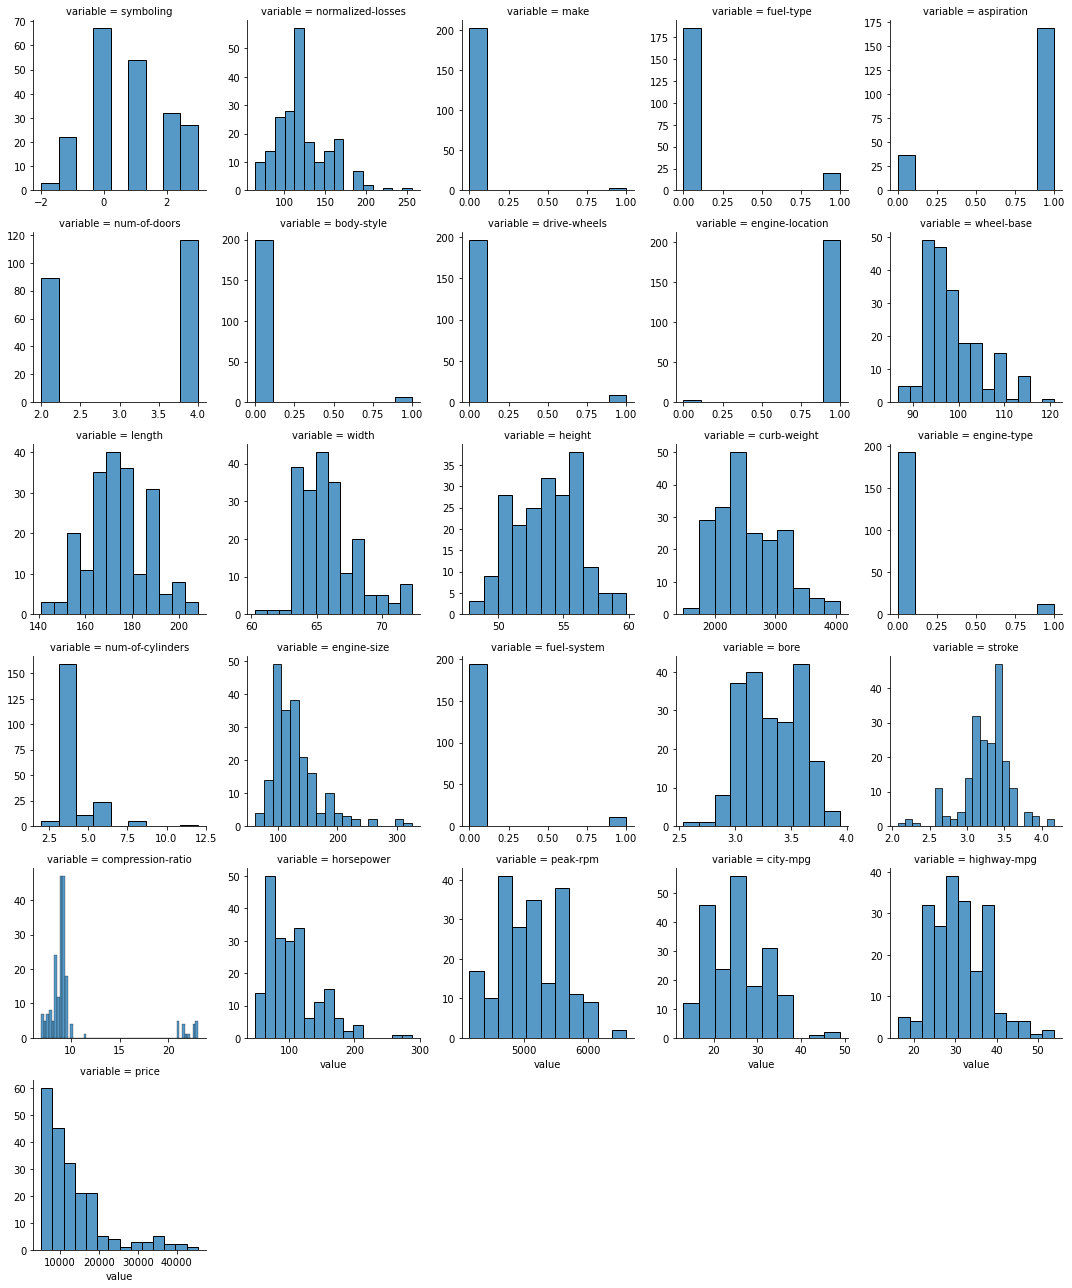

In [50]:
## 看看features的分布情况。
import seaborn as sns
num_features = df.select_dtypes(include=['int64','float64']).copy()
## num_features.drop(['price'],axis=1,inplace=True)               # remove labels

num_feature_names = list(num_features.columns)

num_features_data = pd.melt(df, value_vars=num_feature_names)
g = sns.FacetGrid(num_features_data, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.histplot, "value")


In [51]:
from scipy.stats import norm, skew       
skewed_feats = df[num_feature_names].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness[skewness["Skew"].abs()>0.75]

,Skew
make,8.083822
body-style,5.585411
drive-wheels,4.452381
fuel-system,3.961447
engine-type,3.761052
num-of-cylinders,2.796801
fuel-type,2.712583
compression-ratio,2.591720
engine-size,1.933375
price,1.813927


In [52]:
skew_cols = list(skewness[skewness["Skew"].abs()>1].index)
for col in skew_cols:
    #all_data[col] = boxcox1p(all_data[col], 0.15)                                  # 偏度超过阈值的特征做box-cox变换
    df[col] = np.log1p(df[col])                                       # 偏度超过阈值的特征对数变换
    
del num_features, num_feature_names, num_features_data, g, skewed_feats, col, skew_cols  

In [53]:
df.shape

(205, 26)

In [54]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,0.693147,0.0,0.693147,2,0.693147,0.000000,0.693147,4.495355,...,4.875197,0.0,3.47,2.68,2.302585,4.718499,5000.0,21,27,9.510149
1,3,122,0.693147,0.0,0.693147,2,0.693147,0.000000,0.693147,4.495355,...,4.875197,0.0,3.47,2.68,2.302585,4.718499,5000.0,21,27,9.711176
2,1,122,0.693147,0.0,0.693147,2,0.000000,0.000000,0.693147,4.559126,...,5.030438,0.0,2.68,3.47,2.302585,5.043425,5000.0,19,26,9.711176
3,2,164,0.000000,0.0,0.693147,4,0.000000,0.000000,0.693147,4.613138,...,4.700480,0.0,3.19,3.40,2.397895,4.634729,5500.0,24,30,9.543306
4,2,164,0.000000,0.0,0.693147,4,0.000000,0.693147,0.693147,4.609162,...,4.919981,0.0,3.19,3.40,2.197225,4.753590,5500.0,18,22,9.767152


# 特征降维 ????

1）Principal Component Analysis，PCA
2）ICA
3）xgbooting
4）RFs
5）lasso
6）ridge

# 需要理解到什么level？？

In [55]:
## RFs
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=5)
model.fit(df,df['price'])

RandomForestRegressor(max_depth=5, random_state=1)

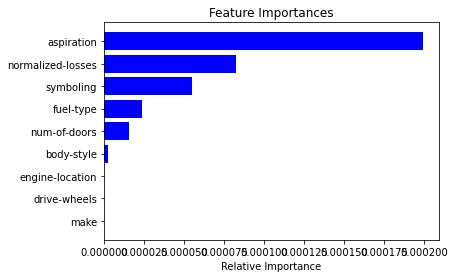

In [57]:
features = df.columns
importances = model.feature_importances_  # 这个是特殊算法
indices = np.argsort(importances[0:9])  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')  ## 这个理解不太好
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(df,df['price'])
pred_3=gbr.predict(x_test)
score_3=r2_score(y_test,pred_3)

In [ ]:
from sklearn.linear_model import Lasso##运用算法来进行训练集的得到特征的重要性，特征选择的一个作用是，wrapper基础模型
lasso_model=Lasso(alpha=0.001)
lasso_model.fit(x_train,y_train)

In [ ]:
## 索引和重要性做成dataframe形式
FI_lasso = pd.DataFrame({"Feature Importance":lasso_model.coef_}, index=all_data.drop(["SalePrice"],axis=1).columns) 
## 由高到低进行排序
FI_lasso.sort_values("Feature Importance",ascending=False).round(5)

In [ ]:
## 获取重要程度大于0的系数指标
FI_lasso[FI_lasso["Feature Importance"] !=0 ].sort_values("Feature Importance").plot(kind="barh",figsize=(12,20), color='g')
plt.xticks(rotation=90)
plt.show()                     ##画图显示

FI_index = FI_lasso.index
FI_val = FI_lasso["Feature Importance"].values
FI_lasso = pd.DataFrame(FI_val, columns = ['Feature Importance'], index = FI_index)
display(FI_lasso.shape)

In [ ]:
## decide to use top 6 features

In [ ]:
##  我考虑到not many features，可以试试都用先。

# 4.Modeling 

In [58]:
y=df['price']
x=df.drop(['price'],axis=1)

In [59]:
y.head()

0    9.510149
1    9.711176
2    9.711176
3    9.543306
4    9.767152
Name: price, dtype: float64

In [60]:
x.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,122,0.693147,0.0,0.693147,2,0.693147,0.000000,0.693147,4.495355,...,1.609438,4.875197,0.0,3.47,2.68,2.302585,4.718499,5000.0,21,27
1,3,122,0.693147,0.0,0.693147,2,0.693147,0.000000,0.693147,4.495355,...,1.609438,4.875197,0.0,3.47,2.68,2.302585,4.718499,5000.0,21,27
2,1,122,0.693147,0.0,0.693147,2,0.000000,0.000000,0.693147,4.559126,...,1.945910,5.030438,0.0,2.68,3.47,2.302585,5.043425,5000.0,19,26
3,2,164,0.000000,0.0,0.693147,4,0.000000,0.000000,0.693147,4.613138,...,1.609438,4.700480,0.0,3.19,3.40,2.397895,4.634729,5500.0,24,30
4,2,164,0.000000,0.0,0.693147,4,0.000000,0.693147,0.693147,4.609162,...,1.791759,4.919981,0.0,3.19,3.40,2.197225,4.753590,5500.0,18,22


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

# CV的代码不太理解，就没有用

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_1=lr.predict(x_test)
score_1=r2_score(y_test,pred_1)

In [64]:
score_1

0.7982120717630604

In [65]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor()
rfg.fit(x_train,y_train)
pred_2=rfg.predict(x_test)
score_2=r2_score(y_test,pred_2)

In [66]:
score_2

0.889301953714826

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_3=gbr.predict(x_test)
score_3=r2_score(y_test,pred_3)

In [68]:
score_3

0.8676643546118535

In [69]:
from sklearn.svm import SVR
svm=SVR()
svm.fit(x_train,y_train)
pred_4=svm.predict(x_test)
score_4=r2_score(y_test,pred_4)

In [70]:
score_4

0.8130462092406672

# 我没有超参数的考虑，自己写不出来。也不太理解啥时候用！